# scqubits example: transmon qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

Set up Matplotlib for plotting into notebook, and import scqubits and numpy:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# Transmon qubit

The transmon qubit is described by the Hamiltonian
\begin{equation}
H=4E_\text{C}(\hat{n}-n_g)^2-\frac{1}{2}E_\text{J}\sum_n(|n\rangle\langle n+1|+\text{h.c.}),
\end{equation}
expressed in terms of the charge operator $\hat{n}$ and its eigenstates $|n\rangle$; $E_C$ is the charging energy, $E_J$ the Josephson energy, and $n_g$ the offset charge. 

<br>

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
tmon = scq.Transmon.create()

Output()

**Programmatic creation**

In [3]:
tmon2 = scq.Transmon(
    EJ=30.02,
    EC=1.2,
    ng=0.0,
    ncut=31
)

**Displaying and modifying parameters**

In [4]:
print(tmon)

Transmon------------|
                    | EJ: 15.0
                    | EC: 0.3
                    | ng: 0.0
                    | ncut: 30
                    | truncated_dim: 10
                    |
                    | dim: 61



In [5]:
tmon.EJ = 16.5

print(tmon)

Transmon------------|
                    | EJ: 16.5
                    | EC: 0.3
                    | ng: 0.0
                    | ncut: 30
                    | truncated_dim: 10
                    |
                    | dim: 61



Modifying values in the above GUI works as well.

## Computing and plotting eigenenergies and wavefunctions

**Eigenenergies.** The energy eigenvalues for the transmon are obtained by calling the `eigenvals()` method. The optional parameter `evals_count` specifies the sought number of eigenenergies.

In [6]:
tmon.eigenvals(evals_count=12)

array([-13.43050468,  -7.45413508,  -1.8196649 ,   3.4343701 ,
         8.21898368,  12.65149873,  15.39327331,  21.01873865,
        21.28500237,  31.17602842,  31.17939631,  44.00315414])

**Eigenstates**. `eigensys` is used to obtain both eigenenergies and eigenstates (represented in charge basis).

In [7]:
evals, evecs = tmon.eigensys()

**Plot energy levels**. 
To plot eigenenergies vs. a qubit parameter (`EJ`, `EC`, or `ng`), we generate an array of values for the desired parameter and call the method `plot_evals_vs_paramvals`:

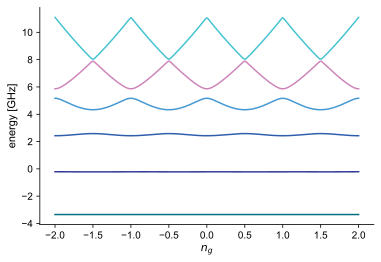

In [8]:
ng_list = np.linspace(-2, 2, 220)
tmon.EJ = 5  # temporarily reduce EJ to see some charge dispersion
tmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=6, subtract_ground=False);

tmon.EJ = 15  # switch back 

**Charge-basis wavefunction for eigenstate**

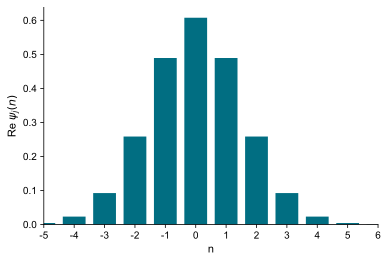

In [9]:
tmon.plot_n_wavefunction(esys=None, which=0, mode='real');

**Phase-basis wavefunction for eigenstate**

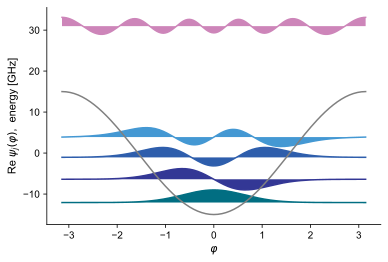

In [10]:
tmon.plot_wavefunction(esys=None, which=(0,1,2,3,10), mode='real');

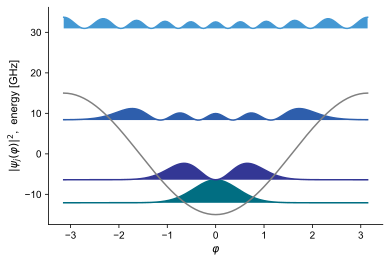

In [11]:
tmon.plot_phi_wavefunction(which=(0, 1, 4, 10), mode='abs_sqr');

## Calculating and visualizing matrix elements

**Compute matrix elements.** Matrix elements can be calculated by referring to the `Transmon` operator methods in string form. For instance, `.n_operator` yields the charge operator:

In [13]:
tmon.matrixelement_table('n_operator', evals_count=3)

array([[ 0.00000000e+00, -1.08780080e+00,  9.71445147e-17],
       [-1.08780080e+00, -4.16333634e-17,  1.49027312e+00],
       [ 9.71445147e-17,  1.49027312e+00,  1.66533454e-16]])

**Plotting matrix elements**. Calling the `.plot_matrixelements` method yields:

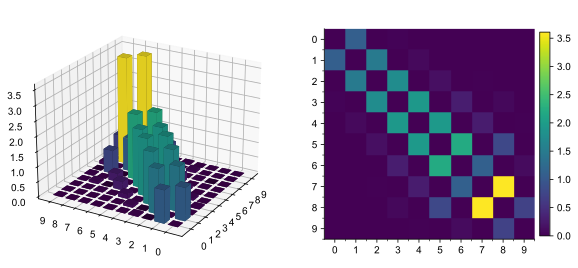

In [29]:
tmon.plot_matrixelements('n_operator', evals_count=10);

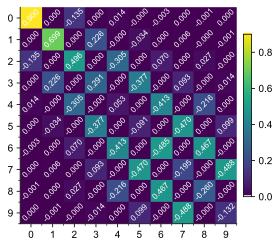

In [30]:
tmon.plot_matrixelements('cos_phi_operator', evals_count=10, show3d=False, show_numbers=True);

**Plot matrix elements vs. parameter value**

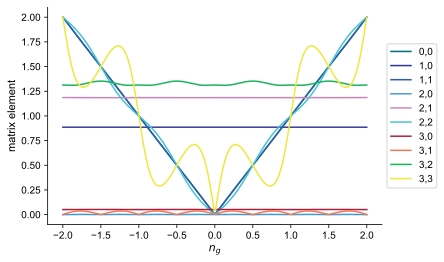

In [39]:
tmon.EJ = 7.0
fig, ax = tmon.plot_matelem_vs_paramvals('n_operator', 'ng', ng_list, select_elems=4);

# Tunable Transmon

Replacing the above transmon's Josephson junction by a SQUID loop makes the transmon tunable. The resulting Hamiltonian is 
\begin{equation}
H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2-\frac{1}{2}E_\text{J,eff}(\Phi_\text{ext})\sum_n(|n\rangle\langle n+1|+\text{h.c.}),
\end{equation}
expressed in the charge basis. Here,  parameters are as above except for the effective Josephson energy $E_\text{J,eff}(\Phi_\text{ext}) = E_{\text{J,max}} \sqrt{\cos^2(\pi\Phi_\text{ext}/\Phi_0)+ d^2 \sin^2 (\pi\Phi_\text{ext}/\Phi_0)}$, where $E_\text{J,max} = E_\text{J1} + E_\text{J2}$ is the maximum Josephson energy, and $d=(E_\text{J1}-E_\text{J2})/(E_\text{J1}+E_\text{J2})$ is the relative junction asymmetry.

<br>

**Create instance.** An instance of a tunable transmon qubit is obtained like this:

In [40]:
tune_tmon = scq.TunableTransmon(
    EJmax=50.0,
    EC=0.5,
    d=0.01,
    flux=0.0,
    ng=0.0,
    ncut=30
)

**Create via GUI**

In [41]:
tune_tmon = scq.TunableTransmon.create()

Output()

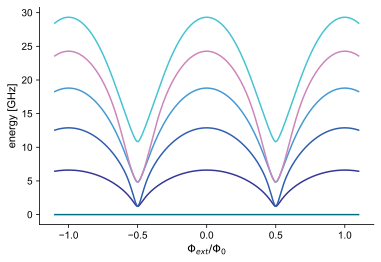

In [42]:
flux_list = np.linspace(-1.1, 1.1, 220)
tune_tmon.plot_evals_vs_paramvals('flux', flux_list, subtract_ground=True);